In [126]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats


### Leitura da planilha

In [127]:
coleta = pd.read_excel('Dados coletados - refactoring.xlsx', sheet_name='coleta')
perfil = pd.read_excel('Dados coletados - refactoring.xlsx', sheet_name='perfil dos participantes')

df = pd.merge(coleta, perfil, on='ID', how='left')


Remoção de colunas 'Unnamed'

In [128]:

df = df.loc[:, ~df.columns.str.startswith('Unnamed')]
display(df)


,ID,Ferramenta,Tempo (h),LOC Modificadas,Erros Funcionais,Problemas de Design,Formacao,Experiencia,Conhecimento_Refatoracao,Conhecimento_Java
0,P1,Tradicional,2.600586,137.462598,3,3,Mestrado,6+ anos,Nenhum,Razoável
1,P2,Tradicional,2.222081,174.035875,2,5,Graduação,1-2 anos,Razoável,Básico
2,P3,Tradicional,2.855597,190.403095,2,5,Graduação,1-2 anos,Avançado,Razoável
3,P4,Tradicional,2.964427,176.679971,0,3,Mestrado,3-5 anos,Básico,Básico
4,P5,Tradicional,2.460526,228.271272,5,6,Mestrado,6+ anos,Nenhum,Básico
...,...,...,...,...,...,...,...,...,...,...
115,P116,SmartRefactor,2.325355,135.311702,0,4,Mestrado,< 1 ano,Básico,Nenhum
116,P117,SmartRefactor,2.441287,134.556471,1,5,Mestrado,1-2 anos,Básico,Razoável
117,P118,SmartRefactor,2.468109,116.797407,1,2,Mestrado,6+ anos,Nenhum,Nenhum
118,P119,SmartRefactor,1.653404,124.803298,0,0,Graduação,3-5 anos,Razoável,Razoável


### Dataframes

In [129]:
tradicional = df[df['Ferramenta'] == 'Tradicional'].reset_index()
smartRefactor = df[df['Ferramenta'] == 'SmartRefactor'].reset_index()


### Perfil dos participantes

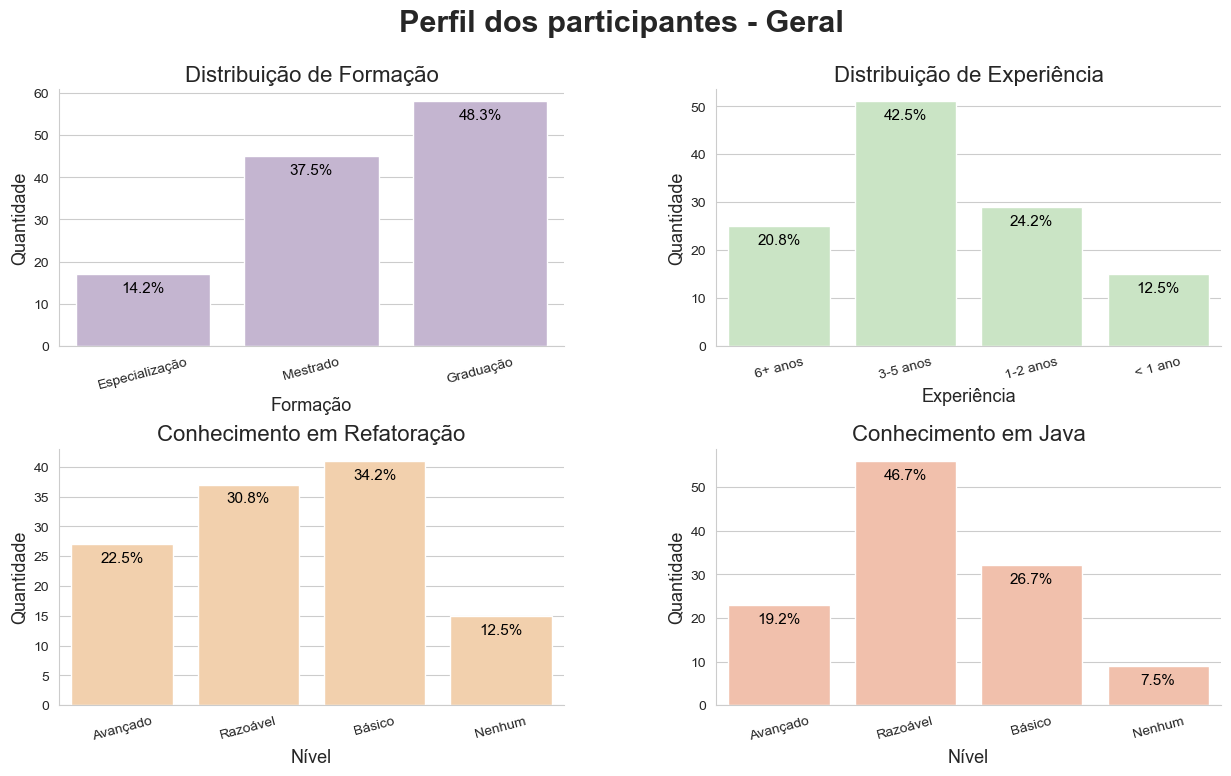

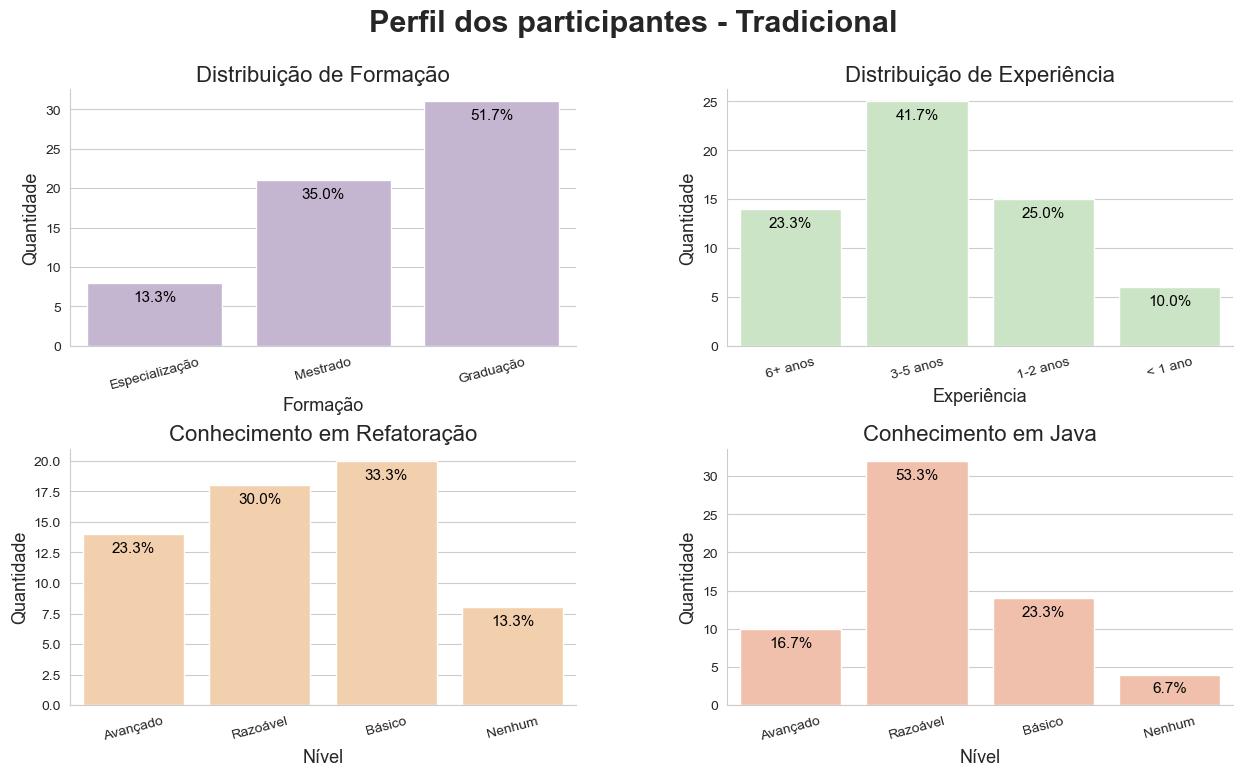

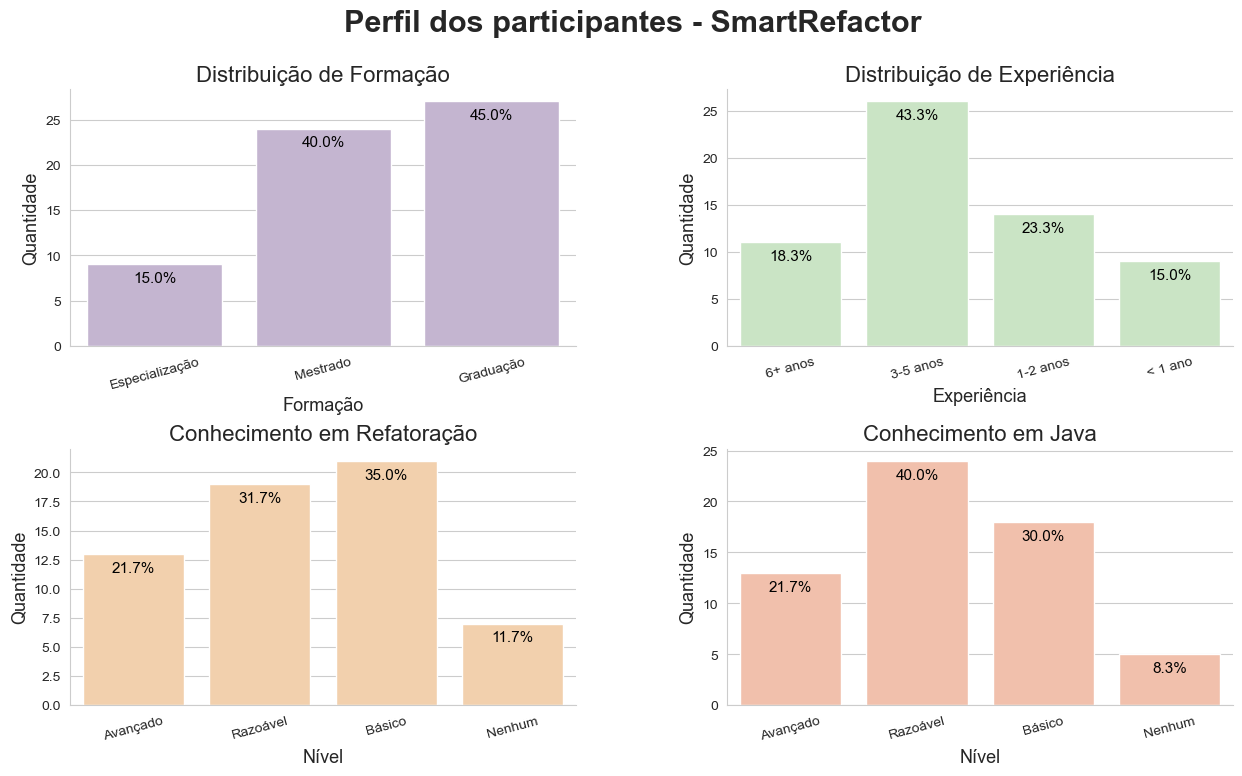

In [130]:
sns.set_style("whitegrid")

paletas = {
    'Formacao': "#c5b0d5",
    'Experiencia': "#c7e9c0",
    'Conhecimento_Refatoracao': "#fdd0a2",
    'Conhecimento_Java': "#fcbba1"
}

def rotulos_porcetagens(ax, total):
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            percent = f'{100 * height / total:.1f}%'
            ax.annotate(percent,
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='top',
                        fontsize=11, color='black', xytext=(0, -5),
                        textcoords='offset points')

def plots(df, ferramenta):
    fig, ax = plt.subplots(2, 2, figsize=(15, 8))
    fig.suptitle(f'Perfil dos participantes - {ferramenta}', fontsize=22, fontweight='bold')
    fig.subplots_adjust(wspace=0.3, hspace=0.4)

    total = len(df)

    sns.countplot(x='Formacao', data=df, ax=ax[0, 0],
                  order=['Especialização', 'Mestrado', 'Graduação'],
                  color=paletas['Formacao'])
    ax[0, 0].set_title('Distribuição de Formação', fontsize=16)
    ax[0, 0].set_xlabel('Formação', fontsize=13)
    ax[0, 0].set_ylabel('Quantidade', fontsize=13)
    ax[0, 0].tick_params(axis='x', rotation=15)
    rotulos_porcetagens(ax[0, 0], total)

    sns.countplot(x='Experiencia', data=df, ax=ax[0, 1], 
                  order=['6+ anos', '3-5 anos', '1-2 anos', '< 1 ano'],
                  color=paletas['Experiencia'])
    ax[0, 1].set_title('Distribuição de Experiência', fontsize=16)
    ax[0, 1].set_xlabel('Experiência', fontsize=13)
    ax[0, 1].set_ylabel('Quantidade', fontsize=13)
    ax[0, 1].tick_params(axis='x', rotation=15)
    rotulos_porcetagens(ax[0, 1], total)

    sns.countplot(x='Conhecimento_Refatoracao', data=df, ax=ax[1, 0],
                  order=['Avançado', 'Razoável', 'Básico', 'Nenhum'],
                  color=paletas['Conhecimento_Refatoracao'])
    ax[1, 0].set_title('Conhecimento em Refatoração', fontsize=16)
    ax[1, 0].set_xlabel('Nível', fontsize=13)
    ax[1, 0].set_ylabel('Quantidade', fontsize=13)
    ax[1, 0].tick_params(axis='x', rotation=15)
    rotulos_porcetagens(ax[1, 0], total)

    sns.countplot(x='Conhecimento_Java', data=df, ax=ax[1, 1],
                  order=['Avançado', 'Razoável', 'Básico', 'Nenhum'],
                  color=paletas['Conhecimento_Java'])
    ax[1, 1].set_title('Conhecimento em Java', fontsize=16)
    ax[1, 1].set_xlabel('Nível', fontsize=13)
    ax[1, 1].set_ylabel('Quantidade', fontsize=13)
    ax[1, 1].tick_params(axis='x', rotation=15)
    rotulos_porcetagens(ax[1, 1], total)

    for a in ax.flatten():
        sns.despine(ax=a)

    plt.show()

plots(df, 'Geral')
plots(tradicional, 'Tradicional')
plots(smartRefactor, 'SmartRefactor')

### Medidas de tendência central associadas à ferramenta tradicional

In [131]:
tradicional.describe()

,index,Tempo (h),LOC Modificadas,Erros Funcionais,Problemas de Design
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,29.500000,2.480380,179.982632,2.316667,4.716667
std,17.464249,0.385926,25.389531,1.396019,2.344063
min,0.000000,1.522770,110.297178,0.000000,0.000000
25%,14.750000,2.257430,167.450521,2.000000,3.000000
50%,29.500000,2.505456,181.107809,2.000000,5.000000
75%,44.250000,2.717416,194.738668,3.000000,6.000000
max,59.000000,3.214068,228.271272,6.000000,11.000000


### Medidas de tendência central associadas à ferramenta SmartRefactor

In [132]:
smartRefactor.describe()

,index,Tempo (h),LOC Modificadas,Erros Funcionais,Problemas de Design
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,89.500000,2.043380,143.620952,0.866667,2.900000
std,17.464249,0.366918,18.264064,0.853044,1.664179
min,60.000000,1.078997,106.790499,0.000000,0.000000
25%,74.750000,1.799212,131.398935,0.000000,2.000000
50%,89.500000,2.030398,143.602046,1.000000,3.000000
75%,104.250000,2.334308,156.821264,1.000000,4.000000
max,119.000000,2.787737,191.197005,3.000000,7.000000


### Box-plots 
- comparação das distribuições entre as ferramentas tradicional e SmartRefactor

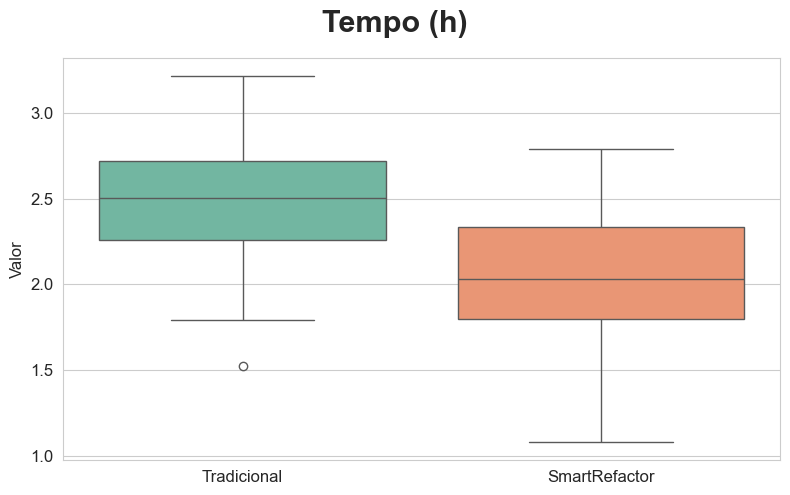

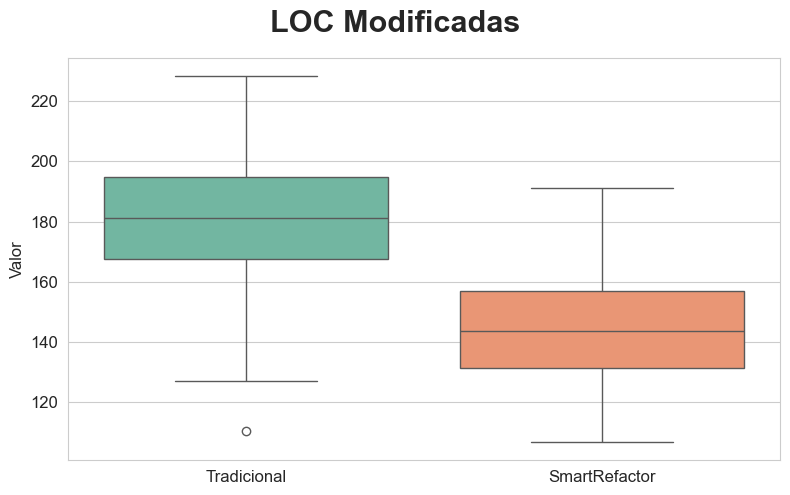

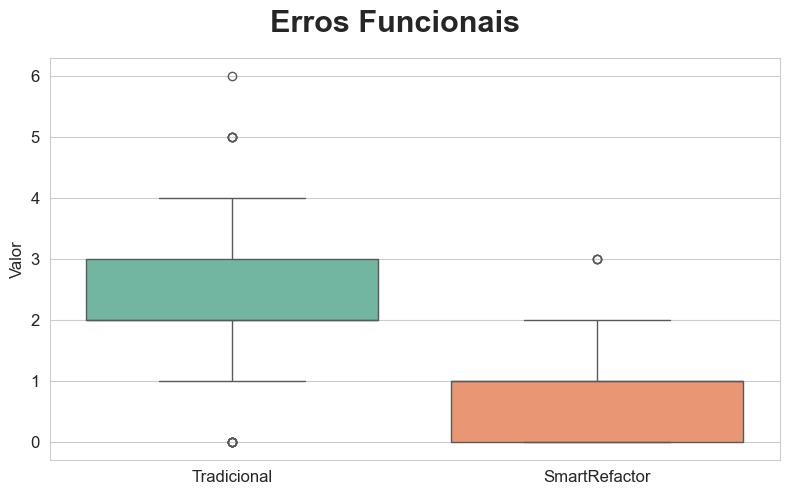

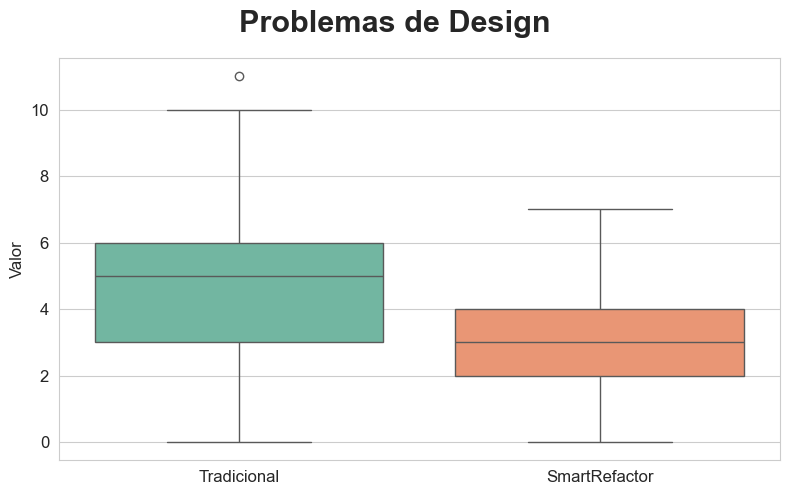

In [133]:
def boxplot(df):
    colunas_numericas = df.select_dtypes(include='number').columns
    # colunas_numericas = colunas_numericas.drop(['index'])

    for col in colunas_numericas:
        
        plt.figure(figsize=(8, 5))
        plt.suptitle(f'{col}', fontsize=22, fontweight='bold')
        sns.boxplot(x='Ferramenta', y=col, data=df, palette='Set2', hue='Ferramenta')

        # Títulos e rótulos
        plt.ylabel('Valor', fontsize=12)
        plt.xlabel('', fontsize=11)

        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)


        # Ajusta o layout para que os gráficos não se sobreponham
        plt.tight_layout()
        plt.show()

boxplot(df)


Identificação dos outliers, apresentando o perfil deles

In [134]:
def outliers(tradicional, smartRefactor):
    dataframes = {"Tradicional": tradicional, "SmartRefactor": smartRefactor}

    for nome, dataframe in dataframes.items():
        print(f"\nAnalisando DataFrame: {nome}")
        colunas_numericas = dataframe.select_dtypes(include='number').columns
        # Excluir a coluna 'index' se existir
        colunas_numericas = [col for col in colunas_numericas if col != 'index']

        for col in colunas_numericas:
            Q1 = dataframe[col].quantile(0.25)
            Q3 = dataframe[col].quantile(0.75)
            IQR = Q3 - Q1
            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR

            outliers = dataframe[(dataframe[col] < limite_inferior) | (dataframe[col] > limite_superior)]

            if not outliers.empty:
                print(f"Outliers para a métrica '{col}':")
                display(outliers)
            else:
                print(f"Sem outliers detectados para a métrica '{col}'.")

outliers(tradicional, smartRefactor)


Analisando DataFrame: Tradicional
Outliers para a métrica 'Tempo (h)':


,index,ID,Ferramenta,Tempo (h),LOC Modificadas,Erros Funcionais,Problemas de Design,Formacao,Experiencia,Conhecimento_Refatoracao,Conhecimento_Java
31,31,P32,Tradicional,1.52277,195.798707,2,5,Graduação,3-5 anos,Básico,Razoável


Outliers para a métrica 'LOC Modificadas':


,index,ID,Ferramenta,Tempo (h),LOC Modificadas,Erros Funcionais,Problemas de Design,Formacao,Experiencia,Conhecimento_Refatoracao,Conhecimento_Java
38,38,P39,Tradicional,2.549743,110.297178,1,7,Especialização,3-5 anos,Razoável,Básico


Outliers para a métrica 'Erros Funcionais':


,index,ID,Ferramenta,Tempo (h),LOC Modificadas,Erros Funcionais,Problemas de Design,Formacao,Experiencia,Conhecimento_Refatoracao,Conhecimento_Java
3,3,P4,Tradicional,2.964427,176.679971,0,3,Mestrado,3-5 anos,Básico,Básico
4,4,P5,Tradicional,2.460526,228.271272,5,6,Mestrado,6+ anos,Nenhum,Básico
14,14,P15,Tradicional,2.303611,165.241877,5,2,Graduação,6+ anos,Básico,Razoável
19,19,P20,Tradicional,2.233657,151.708977,5,6,Mestrado,3-5 anos,Básico,Básico
23,23,P24,Tradicional,2.630185,144.552638,0,6,Mestrado,3-5 anos,Básico,Razoável
29,29,P30,Tradicional,2.460496,182.816104,0,4,Mestrado,6+ anos,Razoável,Nenhum
30,30,P31,Tradicional,2.288004,179.953133,0,7,Graduação,1-2 anos,Básico,Básico
34,34,P35,Tradicional,2.224581,168.186735,5,4,Graduação,3-5 anos,Razoável,Básico
35,35,P36,Tradicional,2.066092,210.514223,6,6,Graduação,1-2 anos,Básico,Razoável
39,39,P40,Tradicional,3.106789,140.319839,0,2,Mestrado,3-5 anos,Nenhum,Avançado


Outliers para a métrica 'Problemas de Design':


,index,ID,Ferramenta,Tempo (h),LOC Modificadas,Erros Funcionais,Problemas de Design,Formacao,Experiencia,Conhecimento_Refatoracao,Conhecimento_Java
44,44,P45,Tradicional,2.575617,176.956463,3,11,Especialização,3-5 anos,Nenhum,Avançado



Analisando DataFrame: SmartRefactor
Sem outliers detectados para a métrica 'Tempo (h)'.
Sem outliers detectados para a métrica 'LOC Modificadas'.
Outliers para a métrica 'Erros Funcionais':


,index,ID,Ferramenta,Tempo (h),LOC Modificadas,Erros Funcionais,Problemas de Design,Formacao,Experiencia,Conhecimento_Refatoracao,Conhecimento_Java
14,74,P75,SmartRefactor,1.345361,159.482649,3,3,Graduação,< 1 ano,Razoável,Razoável
38,98,P99,SmartRefactor,2.371775,179.181907,3,2,Graduação,6+ anos,Básico,Razoável
40,100,P101,SmartRefactor,2.787737,148.277262,3,7,Mestrado,3-5 anos,Avançado,Razoável


Sem outliers detectados para a métrica 'Problemas de Design'.


---------------------------------------------------------------------------------------------------------------------------------

### Estatística Inferencial

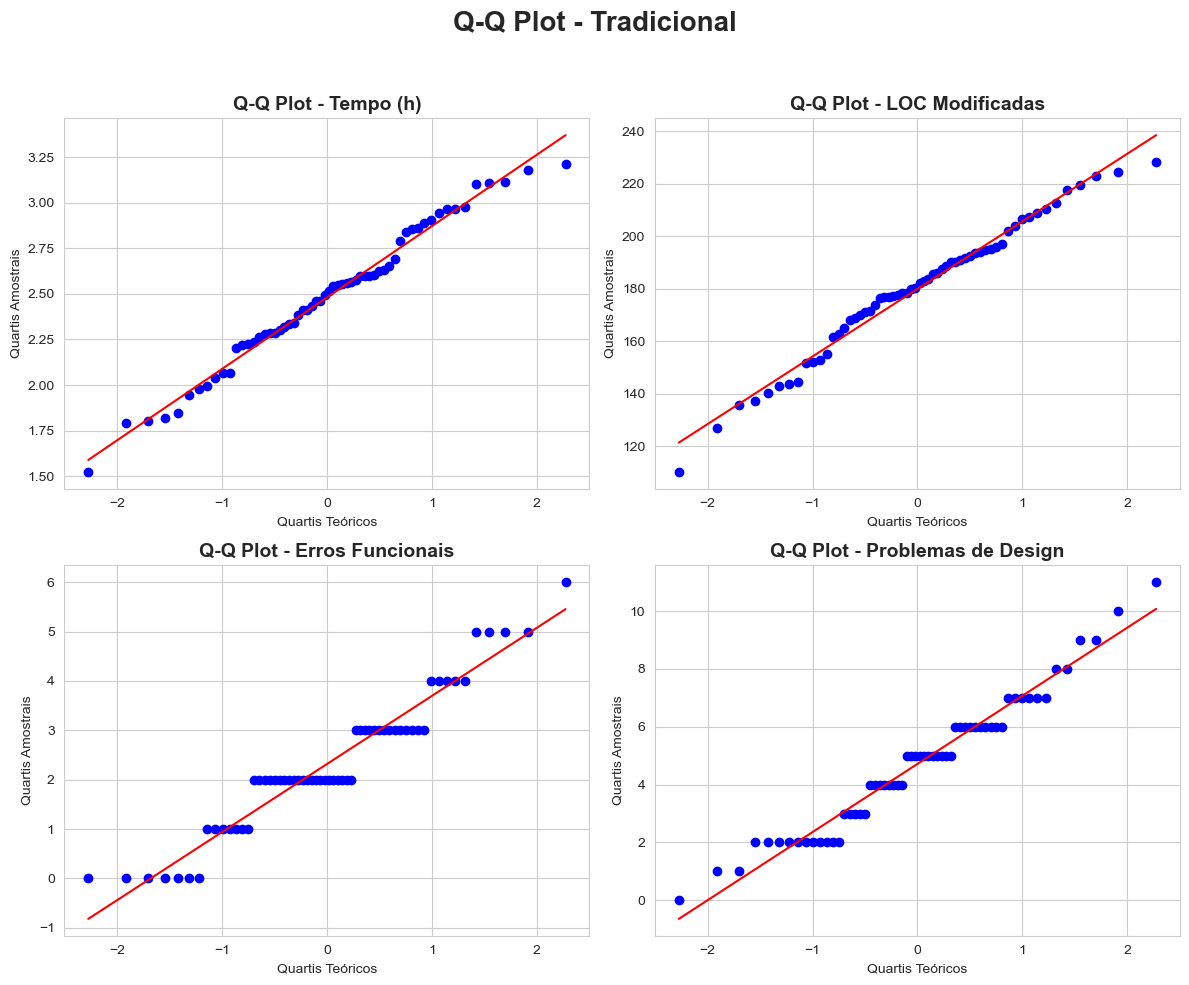

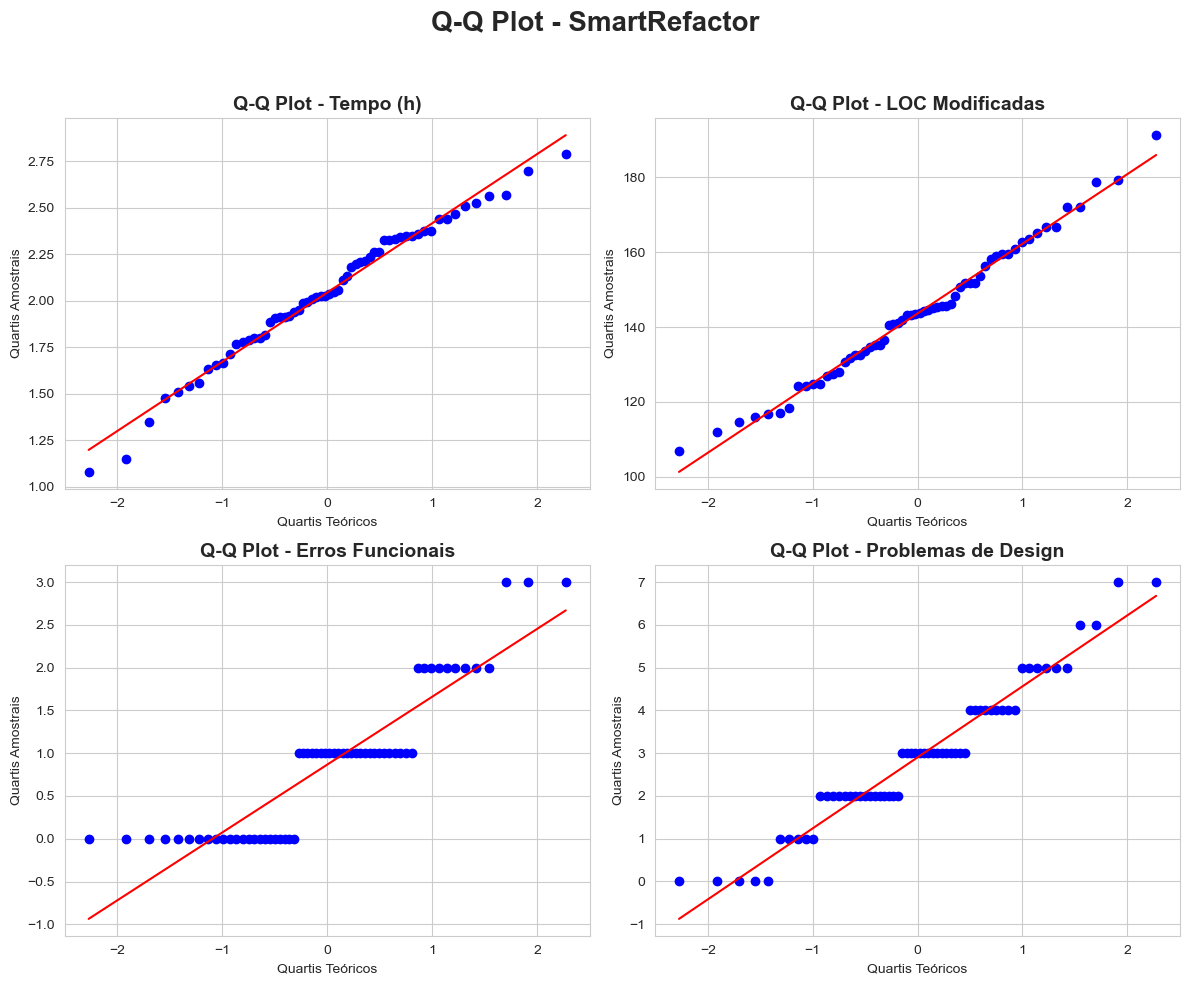

In [135]:
def qq_plot(df, titulo):
    colunas_numericas = df.select_dtypes(include='number').columns.drop('index')

    # Assumindo que sempre tem 4 colunas
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs = axs.flatten()

    for i, col in enumerate(colunas_numericas):
        stats.probplot(df[col], dist="norm", plot=axs[i])
        axs[i].set_title(f'Q-Q Plot - {col}', fontsize=14, fontweight='bold')
        axs[i].set_xlabel('Quartis Teóricos')
        axs[i].set_ylabel('Quartis Amostrais')

    fig.suptitle(titulo, fontsize=20, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Exemplo de uso:
qq_plot(tradicional, 'Q-Q Plot - Tradicional')
qq_plot(smartRefactor, 'Q-Q Plot - SmartRefactor')

Teste de normalidade - Kolmogorov-Smirnov

In [136]:
from scipy.stats import kstest, zscore

normalidade = {
    'tradicional': {'param': [], 'nparam': []},
    'smartRefactor': {'param': [], 'nparam': []}
}

def teste_normalidade_ks(df, nome_df):
    colunas_numericas = df.select_dtypes(include='number').columns
    colunas_numericas = colunas_numericas.drop(['index'])

    print(f"Teste de Kolmogorov-Smirnov - {nome_df}")
    print("---------------------------------------------------------------")

    for col in colunas_numericas:
        dados = df[col].dropna()
        dados_padronizados = zscore(dados)
        estatistica, p_valor = kstest(dados_padronizados, 'norm')
        print(f"{col}: estatística={estatistica:.4f}, p-valor={p_valor:.4f} -> ", end="")
        if p_valor > 0.05:
            print("Segue distribuição normal")
            normalidade[nome_df]['param'].append(col)
        else:
            print("Não segue distribuição normal")
            normalidade[nome_df]['nparam'].append(col)

# Executa os testes para os dois dataframes
teste_normalidade_ks(tradicional, 'tradicional')
print()
teste_normalidade_ks(smartRefactor, 'smartRefactor')


Teste de Kolmogorov-Smirnov - tradicional
---------------------------------------------------------------
Tempo (h): estatística=0.0644, p-valor=0.9510 -> Segue distribuição normal
LOC Modificadas: estatística=0.0978, p-valor=0.5801 -> Segue distribuição normal
Erros Funcionais: estatística=0.1905, p-valor=0.0222 -> Não segue distribuição normal
Problemas de Design: estatística=0.1121, p-valor=0.4082 -> Segue distribuição normal

Teste de Kolmogorov-Smirnov - smartRefactor
---------------------------------------------------------------
Tempo (h): estatística=0.0808, p-valor=0.7981 -> Segue distribuição normal
LOC Modificadas: estatística=0.0807, p-valor=0.7995 -> Segue distribuição normal
Erros Funcionais: estatística=0.2374, p-valor=0.0019 -> Não segue distribuição normal
Problemas de Design: estatística=0.1592, p-valor=0.0854 -> Segue distribuição normal


Colapsamos os erros funcionais superiores a 4 na categoria '4+'. Dessa forma, as frequências esperadas em cada categoria são >= 5%

In [137]:
# Categorizar os erros
def categorizar_erro_funcionais(e):
    if e == 0:
        return '0'
    elif e == 1:
        return '1'
    elif e == 2:
        return '2'
    elif e == 3:
        return '3'
    else:    
        return '4+'


- Aplicação de teste T de Student nas amostras paramétricas
- Aplicação de teste Chi² na amostra não paramétrica

In [ ]:
def testes_inferenciais(tradicional, smartRefactor, nome_df1, nome_df2, normalidade, alpha=0.05):
    print(f"\nTestes estatísticos para: {nome_df1} e {nome_df2}")
    print("---------------------------------------------------------------")

    # Teste t de Student para colunas paramétricas
    for col in normalidade[nome_df1]['param']:

        t_stat, p_value = stats.ttest_ind(tradicional[col], smartRefactor[col])
        print(f"[Teste T] {col}: t = {t_stat:.4f}, p = {p_value} -> ", end="")
        print("Rejeita H0" if p_value < alpha else "Não rejeita H0")

    # Teste qui-quadrado de independência para colunas não paramétricas
    for col in normalidade[nome_df1]['nparam']:

        tradicional['categoria_erro'] = tradicional[col].apply(categorizar_erro_funcionais)
        smartRefactor['categoria_erro'] = smartRefactor[col].apply(categorizar_erro_funcionais)
        data = pd.concat([tradicional, smartRefactor])

        # Tabela de contingência: linhas = ferramenta, colunas = categoria de erro
        tabela = pd.crosstab(data['Ferramenta'], data['categoria_erro'])

        chi2_val, p_value, dof, expected = chi2_contingency(tabela)

        print(f"[Chi²] {col}: χ² = {chi2_val:.4f}, p = {p_value} -> ", end="")
        print("Rejeita H0" if p_value < alpha else "Não rejeita H0")


testes_inferenciais(tradicional, smartRefactor, 'tradicional', 'smartRefactor', normalidade)




Testes estatísticos para: tradicional e smartRefactor
---------------------------------------------------------------
[T-test] Tempo (h): t = 6.3567, p = 4.0371471782249714e-09 -> Rejeita H0
[T-test] LOC Modificadas: t = 9.0054, p = 4.478117414407171e-15 -> Rejeita H0
[T-test] Problemas de Design: t = 4.8950, p = 3.148969526733802e-06 -> Rejeita H0
[Chi²] Erros Funcionais: χ² = 41.2276, p = 2.4114203740913518e-08 -> Rejeita H0
